In [2]:
import pandas as pd 
import numpy as np

# Uploading csv file

In [3]:
df = pd.read_csv("D:\\flights.csv",low_memory=False)

In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(1048575, 31)

# Considering first 1 lakh sample from the data frame

In [7]:
df2 = pd.DataFrame()
df2 = df.iloc[0:100000,:]

In [8]:
df2.shape

(100000, 31)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [10]:
df2["DIVERTED"].unique()

array([0, 1], dtype=int64)

In [11]:
df2["DIVERTED"].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

# Considering pair plot of all the variables

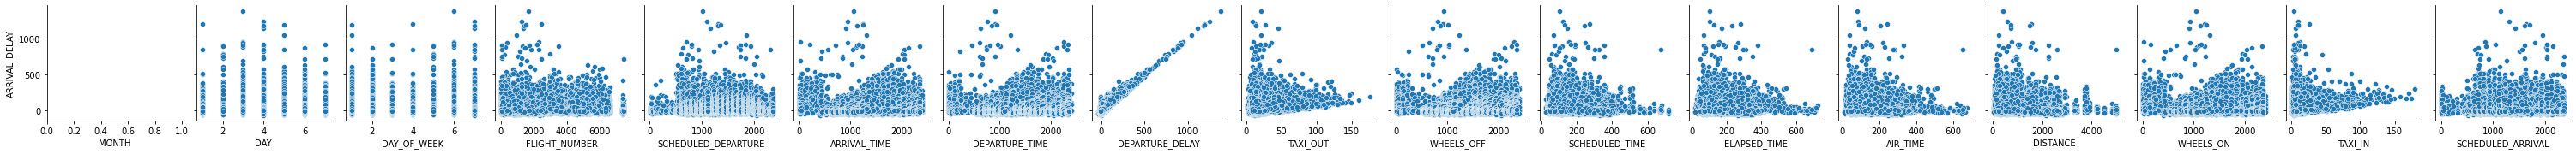

In [12]:
import seaborn as sns
sns.pairplot(df2, x_vars = ['MONTH', 'DAY', 'DAY_OF_WEEK','FLIGHT_NUMBER','SCHEDULED_DEPARTURE','ARRIVAL_TIME','DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL'], y_vars = ['ARRIVAL_DELAY'])

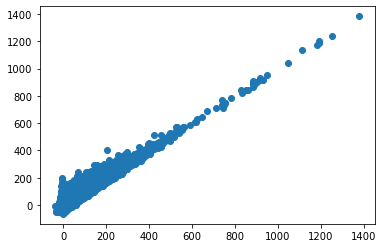

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df2.DEPARTURE_DELAY,df2.ARRIVAL_DELAY)

# Dropping extra columns

In [14]:
df3 = df2.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis = 'columns')

In [15]:
df3.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,NaN,NaN,NaN,NaN,NaN


In [16]:
df3.shape

(100000, 15)

# Finding corelation between variables

In [17]:
df3.corr(method ='kendall')

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,1.000000,-0.095032,0.043389,-0.080659,0.051281,0.004473,-0.004476,0.051981,-0.015265,-0.040745,0.003015,0.048038
SCHEDULED_DEPARTURE,NaN,-0.095032,1.000000,0.191452,0.737494,0.148538,0.002086,-0.002919,-0.128948,-0.012426,0.018272,0.229405,-0.029049
DEPARTURE_DELAY,NaN,0.043389,0.191452,1.000000,0.179665,0.609465,0.016663,0.019537,-0.243713,-0.006973,0.233648,0.473812,0.070437
SCHEDULED_ARRIVAL,NaN,-0.080659,0.737494,0.179665,1.000000,0.140347,0.004741,-0.011642,-0.099515,-0.005824,0.012479,0.194043,-0.029503
ARRIVAL_DELAY,NaN,0.051281,0.148538,0.609465,0.140347,1.000000,NaN,NaN,0.080336,-0.009051,0.152795,0.358954,0.100086
DIVERTED,NaN,0.004473,0.002086,0.016663,0.004741,NaN,1.000000,-0.007413,NaN,NaN,NaN,NaN,NaN
CANCELLED,NaN,-0.004476,-0.002919,0.019537,-0.011642,NaN,-0.007413,1.000000,NaN,NaN,NaN,NaN,NaN
AIR_SYSTEM_DELAY,NaN,0.051981,-0.128948,-0.243713,-0.099515,0.080336,NaN,NaN,1.000000,-0.009196,-0.239486,-0.255351,0.037334
SECURITY_DELAY,NaN,-0.015265,-0.012426,-0.006973,-0.005824,-0.009051,NaN,NaN,-0.009196,1.000000,-0.041193,-0.013419,-0.011635


# Filling NaN values with mean

In [18]:
df3.isna().sum()

MONTH                      0
DAY                        0
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_DELAY         2298
SCHEDULED_ARRIVAL          0
ARRIVAL_DELAY           2613
DIVERTED                   0
CANCELLED                  0
AIR_SYSTEM_DELAY       65375
SECURITY_DELAY         65375
AIRLINE_DELAY          65375
LATE_AIRCRAFT_DELAY    65375
WEATHER_DELAY          65375
dtype: int64

In [19]:
mean_depdel = df3.DEPARTURE_DELAY.mean()
mean_arrdel = df3.ARRIVAL_DELAY.mean()
mean_airsysdel = df3.AIR_SYSTEM_DELAY.mean()
mean_secdel = df3.SECURITY_DELAY.mean()
mean_airlinedel = df3.AIRLINE_DELAY.mean()
mean_lateairdel = df3.LATE_AIRCRAFT_DELAY.mean()
mean_weatherdel = df3.WEATHER_DELAY.mean()

In [20]:
df3.DEPARTURE_DELAY = df3.DEPARTURE_DELAY.fillna(mean_depdel)
df3.ARRIVAL_DELAY = df3.ARRIVAL_DELAY.fillna(mean_arrdel)
df3.AIR_SYSTEM_DELAY = df3.AIR_SYSTEM_DELAY.fillna(mean_airsysdel)
df3.SECURITY_DELAY = df3.SECURITY_DELAY.fillna(mean_secdel)
df3.AIRLINE_DELAY = df3.AIRLINE_DELAY.fillna(mean_airlinedel)
df3.LATE_AIRCRAFT_DELAY = df3.LATE_AIRCRAFT_DELAY.fillna(mean_lateairdel)
df3.WEATHER_DELAY = df3.WEATHER_DELAY.fillna(mean_weatherdel)

In [21]:
df3.isna().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

# Creating Result column and finding the number of flights that got delayed more than 15 mins

In [168]:
c=0
list1 = []
for i in range(len(df3.ARRIVAL_DELAY)):
    if df3.ARRIVAL_DELAY[i] > 15:
        list1.append(1)
        c=c+1
        continue
    else:
        list1.append(0)

In [170]:
list1
df3['result'] = list1

In [171]:
df3['result'].unique()

array([0, 1], dtype=int64)

In [172]:
print('The number of flights who got delayed more than 15 mins',c)

The number of flights who got delayed more than 15 mins 36221


# Splitting the dataset and creating the model of decision tree 

In [173]:
X = df3[['MONTH','DAY','SCHEDULED_DEPARTURE','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','DIVERTED','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY' ]]

In [174]:
y = df3[['result']] 

In [175]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [176]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [177]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [178]:
model.score(x_train,y_train)

1.0

In [179]:
model.score(x_test,y_test)
y_test

,result
75721,1
80184,0
19864,0
76699,0
92991,0
...,...
42648,1
86306,0
45466,0
63724,0


In [181]:
y_predict = pd.DataFrame()
y_predict = model.predict(x_test)
len(y_predict)

30000

# Predicting the model score using AUC-ROC Concept

In [182]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict)

0.9935368641646029